# Matplotlib
Creating static Plots using the matplotlib package in Python

In [53]:
import matplotlib.pyplot as plt
import numpy as np

print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


List the available builtin styles, and choose one. If you don't specifically choose one style Matplotlib will use its default style. Use `plt.xkcd()` for plots which look like they are from comic books.

In [52]:
plt.style.use('ggplot')
# plt.xkcd() 

## Line Plot 

[ 0  1  2  3  4  5  6  7  8  9 10]


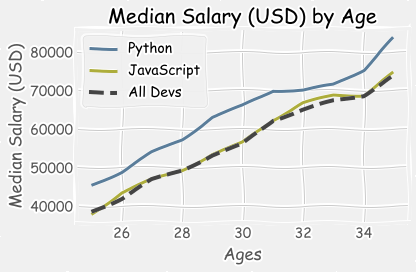

In [56]:
ages_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

# Median Python Developer Salaries by Age
py_dev_y = [45372, 48876, 53850, 57287, 63016,
            65998, 70003, 70000, 71496, 75370, 83640]

plt.plot(ages_x, py_dev_y, color='#5a7d9a', linewidth=3, label='Python')

# Median JavaScript Developer Salaries by Age
js_dev_y = [37810, 43515, 46823, 49293, 53437,
            56373, 62375, 66674, 68745, 68746, 74583]

plt.plot(ages_x, js_dev_y, color='#adad3b', linewidth=3, label='JavaScript')

# Median Developer Salaries by Age
dev_y = [38496, 42000, 46752, 49320, 53200,
         56000, 62316, 64928, 67317, 68748, 73752]

plt.plot(ages_x, dev_y, color='#444444', linestyle='--', label='All Devs')

plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.title('Median Salary (USD) by Age')

plt.legend()

plt.grid(True)

plt.tight_layout()

plt.savefig('line_plot.png')

plt.show()

## Bar Charts

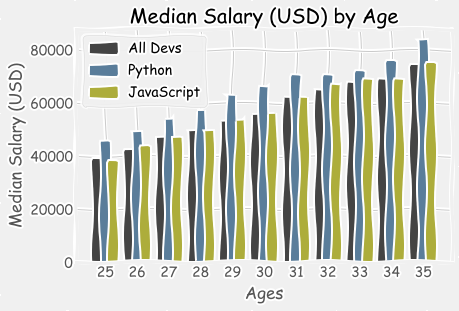

In [58]:
plt.style.use('fivethirtyeight')

x_indexes = np.arange(len(ages_x))
width = 0.25

plt.bar(x_indexes - width, dev_y, color='#444444', width=width, label='All Devs')
plt.bar(x_indexes, py_dev_y, color='#5a7d9a', width=width, label='Python')
plt.bar(x_indexes + width, js_dev_y, color='#adad3b', width=width, label='JavaScript')

plt.xticks(ticks=x_indexes, labels=ages_x)

plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.title('Median Salary (USD) by Age')

plt.legend()

plt.show()

### Get the data from a `.csv` file

In [62]:
import csv

with open('data.csv') as csv_file:
    csv_reader = csv.DictReader(csv_file)

    # Print the first row

    row = next(csv_reader)
    print(row)
    print(row['LanguagesWorkedWith'].split(';'))

OrderedDict([('Responder_id', '1'), ('LanguagesWorkedWith', 'HTML/CSS;Java;JavaScript;Python')])
['HTML/CSS', 'Java', 'JavaScript', 'Python']


A brief introduction to `Counter` here.

In [63]:
from collections import Counter

c = Counter(['Python', 'JavaScript'])
c


Counter({'Python': 1, 'JavaScript': 1})

In [64]:
c.update(['C++', 'Python'])
c

Counter({'Python': 2, 'JavaScript': 1, 'C++': 1})

In [65]:
c.update(['C++', 'Python'])
c

Counter({'Python': 3, 'JavaScript': 1, 'C++': 2})

Back to our csv data.

In [67]:
with open('data.csv') as csv_file:
    csv_reader = csv.DictReader(csv_file)

    language_counter = Counter()

    for row in csv_reader:
        language_counter.update(row['LanguagesWorkedWith'].split(';'))

print(language_counter.most_common(15))

[('JavaScript', 59219), ('HTML/CSS', 55466), ('SQL', 47544), ('Python', 36443), ('Java', 35917), ('Bash/Shell/PowerShell', 31991), ('C#', 27097), ('PHP', 23030), ('C++', 20524), ('TypeScript', 18523), ('C', 18017), ('Other(s):', 7920), ('Ruby', 7331), ('Go', 7201), ('Assembly', 5833)]


Let's say we are interested in the top 15 most common languages. Now we have to split the `keys` and `values` to their own lists.

In [68]:
languages = []
popularity = []

for item in language_counter.most_common(15):
    languages.append(item[0])
    popularity.append(item[1])

print(languages)
print(popularity)

['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java', 'Bash/Shell/PowerShell', 'C#', 'PHP', 'C++', 'TypeScript', 'C', 'Other(s):', 'Ruby', 'Go', 'Assembly']
[59219, 55466, 47544, 36443, 35917, 31991, 27097, 23030, 20524, 18523, 18017, 7920, 7331, 7201, 5833]


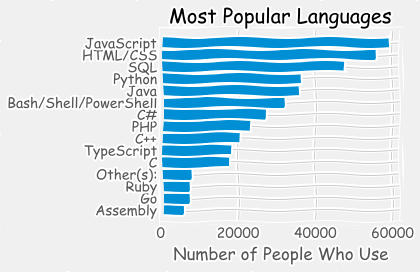

In [73]:
languages.reverse()
popularity.reverse()

plt.barh(languages, popularity)

plt.title("Most Popular Languages")
plt.xlabel("Number of People Who Use")

plt.tight_layout()

plt.show()

Faster way to load the data using `pandas`.

In [77]:
import pandas as pd

data = pd.read_csv('data.csv')
ids = data['Responder_id']
lang_responses = data['LanguagesWorkedWith']
print(lang_responses)

language_counter = Counter()

for response in lang_responses:
    language_counter.update(response.split(';'))

languages = []
popularity = []

for item in language_counter.most_common(15):
    languages.append(item[0])
    popularity.append(item[1])

languages.reverse()
popularity.reverse()

plt.barh(languages, popularity)

plt.title("Most Popular Languages")
plt.xlabel("Number of People Who Use")

plt.tight_layout()

plt.show()

0                          HTML/CSS;Java;JavaScript;Python
1                                      C++;HTML/CSS;Python
2                                                 HTML/CSS
3                                      C;C++;C#;Python;SQL
4              C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA
                               ...                        
87564                             HTML/CSS;Java;JavaScript
87565                           HTML/CSS;JavaScript;Python
87566    Bash/Shell/PowerShell;Go;HTML/CSS;JavaScript;W...
87567                        HTML/CSS;JavaScript;Other(s):
87568    Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...
Name: LanguagesWorkedWith, Length: 87569, dtype: object
